In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

### Helper Functions

In [2]:
def plot_moons(pl, X, y):
    # plot half moon for class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot half moon for class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    plot_moons(plt, X, y)

    return plt

### Generate sample data and split Train/Test

In [3]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Keras Model

In [8]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(2, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

# Define Optimizer, Loss and Metrics
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

# Start the Learning
model.fit(X_train, y_train, epochs=100, verbose=0)

### Print the performance

In [5]:
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

300/300 [==============================] - 0s 136us/step


Test loss: 0.02277091334030653 Test accuracy: 0.9866666666666667


### Plot Decision Boundary

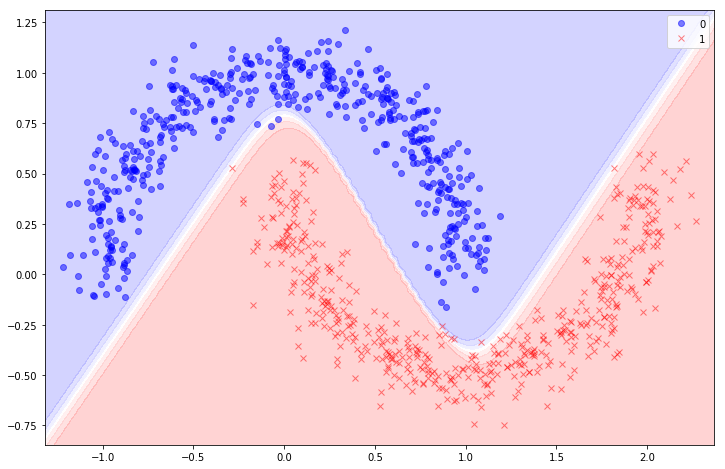

In [6]:
plot_decision_boundary(model, X, y).show()